# Stock price prediction of Himalayan Bank Ltd. Nepal

I downloaded stock price history from nepalese website https://nepsealpha.com/  In menu choose investoring tolls> Nepse data download.I downloaded the excel format file which is loaded to jupyter notebook using read_excel method of pandas library.Pandas is a most useful library for data manipulation. The loaded data cleaning is done using codes below

In [1]:
import pandas as pd
df=pd.read_excel('nepsealpha_export_price_HBL_2019-01-18_2023-05-18.xlsx')
df

,nepsealpha_export_price_HBL_2019-01-18_2023-05-18,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
1,HBL,2023-05-18 00:00:00,216.6,220.3,216,220,0.87,29286
2,HBL,2023-05-17 00:00:00,220,220.4,216.3,218.1,0.51,36503
3,HBL,2023-05-16 00:00:00,214.1,219,213,217,0.42,76081
4,HBL,2023-05-15 00:00:00,216,220,215,216.1,-0.01,47829
...,...,...,...,...,...,...,...,...
733,HBL,2019-01-24 00:00:00,451,452,450,452,0.22,478
734,HBL,2019-01-23 00:00:00,449,452,449,451,0.45,1657
735,HBL,2019-01-22 00:00:00,449,455,447,449,0,2053
736,HBL,2019-01-21 00:00:00,448,450,449,449,0.22,879


In [2]:
df.drop(columns=['nepsealpha_export_price_HBL_2019-01-18_2023-05-18','Unnamed: 2','Unnamed: 3'],inplace=True)

In [3]:
df

,Unnamed: 1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Date,Low,Close,Percent Change,Volume
1,2023-05-18 00:00:00,216,220,0.87,29286
2,2023-05-17 00:00:00,216.3,218.1,0.51,36503
3,2023-05-16 00:00:00,213,217,0.42,76081
4,2023-05-15 00:00:00,215,216.1,-0.01,47829
...,...,...,...,...,...
733,2019-01-24 00:00:00,450,452,0.22,478
734,2019-01-23 00:00:00,449,451,0.45,1657
735,2019-01-22 00:00:00,447,449,0,2053
736,2019-01-21 00:00:00,449,449,0.22,879


I took only date and close column for price prediction with name df1 and rename the columns as ds and close

In [4]:
df1=df[['Unnamed: 1','Unnamed: 5']]
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  738 non-null    object
 1   Unnamed: 5  738 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB


In [5]:
df1.rename(columns={'Unnamed: 1':'ds','Unnamed: 5':'close'},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\2424115077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Unnamed: 1':'ds','Unnamed: 5':'close'},inplace=True)


Here first record has column names so we need to drop it.Since ds column is of object type we need to change it to date format so we can proceed further for comparision. 

In [6]:
df1.drop(0,inplace=True)
df1['ds']=pd.to_datetime(df1['ds'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\336808658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(0,inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\336808658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds']=pd.to_datetime(df1['ds'])


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 1 to 737
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      737 non-null    datetime64[ns]
 1   close   737 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 11.6+ KB


In [8]:
df1.set_index('ds')

,close
ds,
2023-05-18,220
2023-05-17,218.1
2023-05-16,217
2023-05-15,216.1
2023-05-14,218
...,...
2019-01-24,452
2019-01-23,451
2019-01-22,449


In [9]:
df1['close']=df1['close'].astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\3678527116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['close']=df1['close'].astype(float)


Similarly close column should be changed into float we did it in upper cell code.

In [10]:
df1

,ds,close
1,2023-05-18,220.0
2,2023-05-17,218.1
3,2023-05-16,217.0
4,2023-05-15,216.1
5,2023-05-14,218.0
...,...,...
733,2019-01-24,452.0
734,2019-01-23,451.0
735,2019-01-22,449.0
736,2019-01-21,449.0


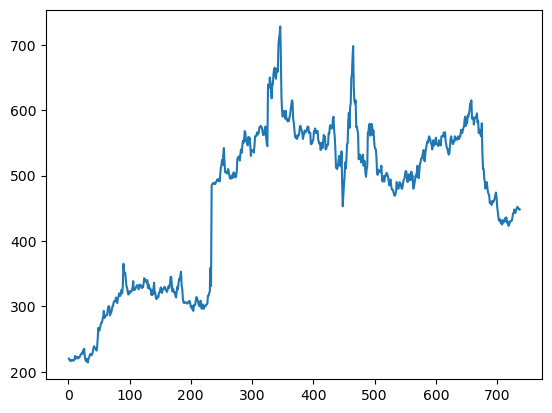

In [11]:
import matplotlib.pyplot as plt
df=df1.iloc[::-1]
plt.plot(df1['close'])
    

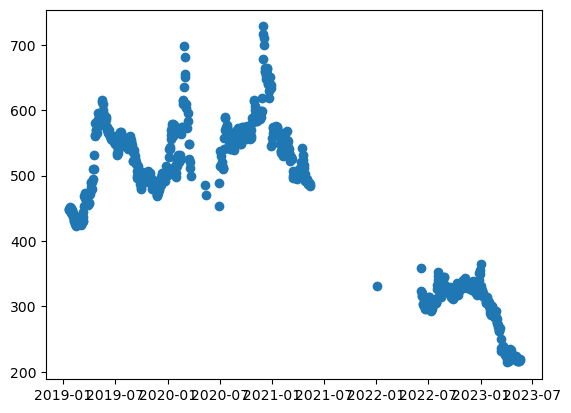

In [12]:
plt.scatter(data=df1,x='ds',y='close')

The  above graph shows that the price is contineously decreasing recently in 2023.Price reached highest in last month 2020

In [13]:
df1[df1['close']>=700]

,ds,close
344,2020-12-02,710.0
345,2020-12-01,716.0
346,2020-11-30,728.0


In [14]:
from prophet import Prophet
m=Prophet(weekly_seasonality=True)

We use a model developed by facebook scientists called fbprophet which deals with time series forecasting.I named the model m with weekly seasonality.

In [15]:
df1[df1['close']<=220]  #Find low prices with date

,ds,close
1,2023-05-18,220.0
2,2023-05-17,218.1
3,2023-05-16,217.0
4,2023-05-15,216.1
5,2023-05-14,218.0
6,2023-05-11,218.0
7,2023-05-10,217.0
8,2023-05-09,218.0
9,2023-05-08,217.0
10,2023-05-07,219.0


In [16]:
df1.rename(columns={'close':'y'},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\235015126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'close':'y'},inplace=True)


In [17]:
m.fit(df1)

08:06:58 - cmdstanpy - INFO - Chain [1] start processing
08:06:58 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future=m.make_future_dataframe(periods=365)
pred=m.predict(future)

In [19]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-20,384.445152,399.736024,458.285768,384.445152,384.445152,44.444325,44.444325,44.444325,6.779623,6.779623,6.779623,37.664702,37.664702,37.664702,0.0,0.0,0.0,428.889477
1,2019-01-21,386.060030,400.760246,460.439078,386.060030,386.060030,43.721589,43.721589,43.721589,7.045455,7.045455,7.045455,36.676134,36.676134,36.676134,0.0,0.0,0.0,429.781620
2,2019-01-22,387.674909,400.464367,456.293773,387.674909,387.674909,41.851402,41.851402,41.851402,6.446614,6.446614,6.446614,35.404788,35.404788,35.404788,0.0,0.0,0.0,429.526311
3,2019-01-23,389.289787,401.777978,460.512389,389.289787,389.289787,41.296558,41.296558,41.296558,7.426429,7.426429,7.426429,33.870129,33.870129,33.870129,0.0,0.0,0.0,430.586345
4,2019-01-24,390.904665,403.307574,458.672917,390.904665,390.904665,41.224424,41.224424,41.224424,9.126062,9.126062,9.126062,32.098361,32.098361,32.098361,0.0,0.0,0.0,432.129089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2024-05-13,83.280161,-101.999796,280.840028,-104.333659,260.848559,5.786689,5.786689,5.786689,7.045455,7.045455,7.045455,-1.258767,-1.258767,-1.258767,0.0,0.0,0.0,89.066850
1097,2024-05-14,82.893553,-108.233597,270.732923,-105.549945,261.188750,5.310353,5.310353,5.310353,6.446614,6.446614,6.446614,-1.136261,-1.136261,-1.136261,0.0,0.0,0.0,88.203905
1098,2024-05-15,82.506944,-107.620236,269.741317,-106.766231,261.422144,6.369631,6.369631,6.369631,7.426429,7.426429,7.426429,-1.056798,-1.056798,-1.056798,0.0,0.0,0.0,88.876575
1099,2024-05-16,82.120336,-102.315483,279.690537,-107.766799,261.596551,8.096244,8.096244,8.096244,9.126062,9.126062,9.126062,-1.029818,-1.029818,-1.029818,0.0,0.0,0.0,90.216580


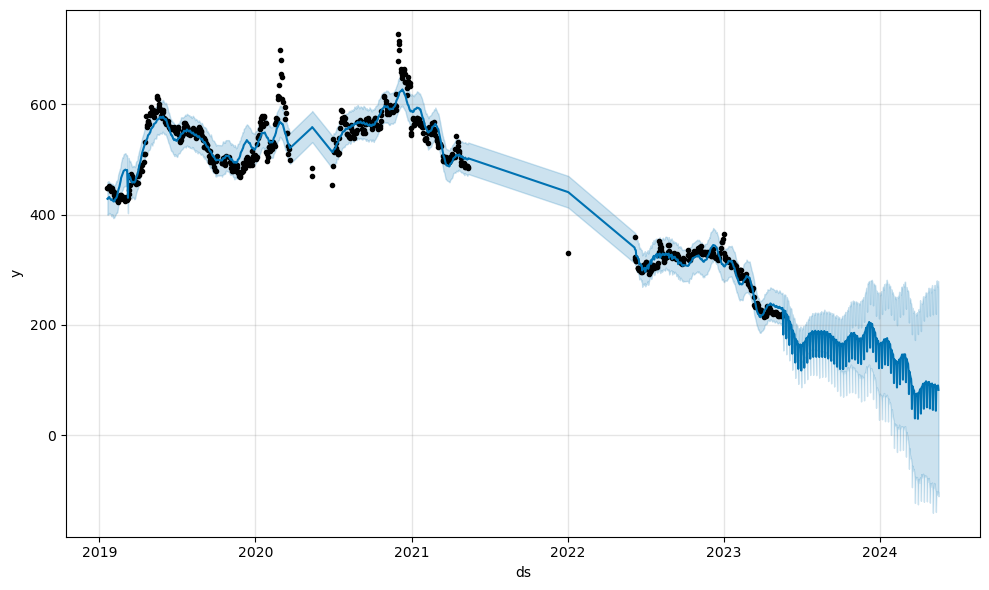

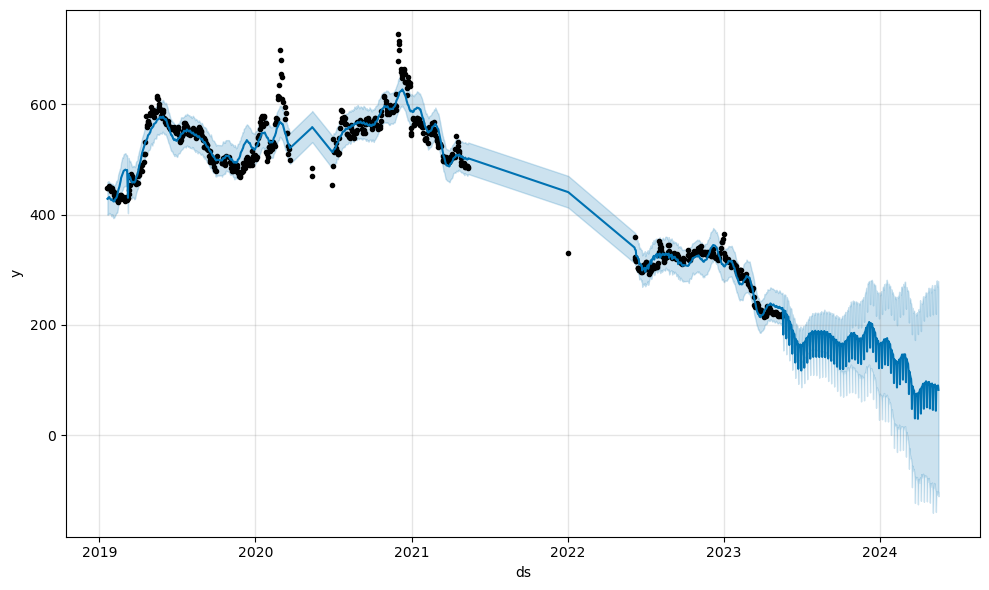

In [20]:
m.plot(pred)

The model shows that the prices will fall contineously for next year with little rises in some times.

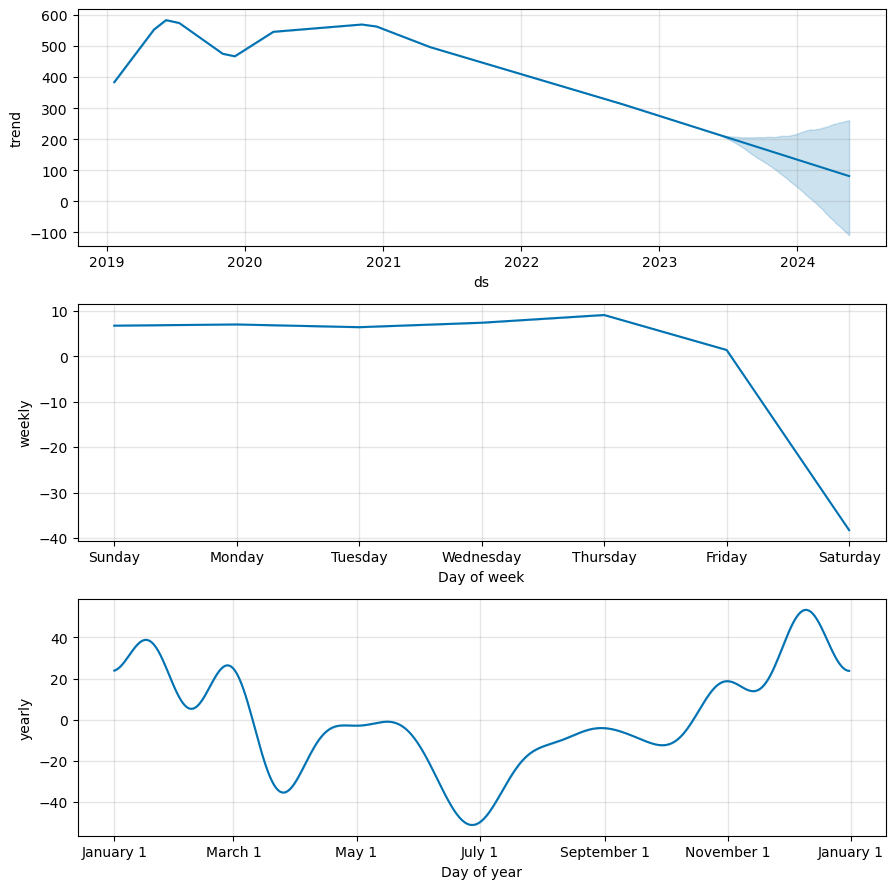

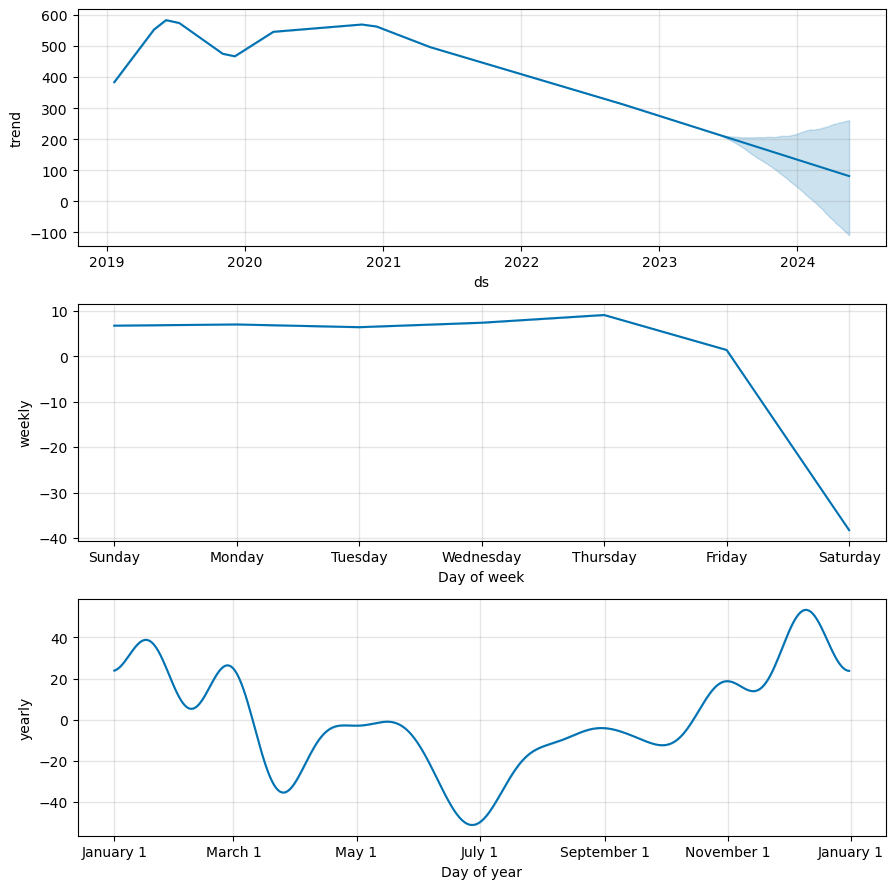

In [21]:
m.plot_components(pred)

From these component plots we came to know that prices fall in july and reach highest in january. Saturday is holiday so the price falls on that day of the week.This is just a forecast for educational purpose ,please do not take this as authentic and do not invest on basis of this prediction.This prediction seems quite similar with the prevailing market trend.

# Please do not invest only on this basis, because stock prices are affected by various factors.

Same prediction can be done using ann(Artificial Recurrent Neural Network ) based LSTM (Long Term Short Term Memory) of deep learning technique

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [23]:
df1

,ds,y
1,2023-05-18,220.0
2,2023-05-17,218.1
3,2023-05-16,217.0
4,2023-05-15,216.1
5,2023-05-14,218.0
...,...,...
733,2019-01-24,452.0
734,2019-01-23,451.0
735,2019-01-22,449.0
736,2019-01-21,449.0


In [24]:
scale=MinMaxScaler()
scaled_df=scale.fit_transform(df1['y'].values.reshape(-1,1))
pred_days=60
xtrain,ytrain=[],[]
for x in range(pred_days,len(df1)):
    xtrain.append(scaled_df[x-pred_days :x,0])
    ytrain.append(scaled_df[x,0])
len(xtrain),len(ytrain)

(677, 677)

In [25]:
xtrain,ytrain=np.array(xtrain),np.array(ytrain)
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain

array([[[0.01148083],
        [0.00778362],
        [0.00564312],
        ...,
        [0.15353182],
        [0.13212687],
        [0.13796458]],

       [[0.00778362],
        [0.00564312],
        [0.00389181],
        ...,
        [0.13212687],
        [0.13796458],
        [0.1397159 ]],

       [[0.00564312],
        [0.00389181],
        [0.00758903],
        ...,
        [0.13796458],
        [0.1397159 ],
        [0.1397159 ]],

       ...,

       [[0.71200623],
        [0.61860284],
        [0.57579296],
        ...,
        [0.45903872],
        [0.46293053],
        [0.46098463]],

       [[0.61860284],
        [0.57579296],
        [0.57579296],
        ...,
        [0.46293053],
        [0.46098463],
        [0.45709282]],

       [[0.57579296],
        [0.57579296],
        [0.5466044 ],
        ...,
        [0.46098463],
        [0.45709282],
        [0.45709282]]])

create a LSTM model 

In [26]:
m=Sequential()
m.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
m.add(Dropout(.2))
m.add(LSTM(units=50,return_sequences=False))
m.add(Dense(25))
m.add(Dense(1))
m.compile(optimizer='adam',loss='mean_squared_error')
m.fit(xtrain,ytrain,epochs=50,batch_size=32)

Epoch 1/50
22/22 [==============================] - 6s 34ms/step - loss: 0.0676
Epoch 2/50
22/22 [==============================] - 1s 32ms/step - loss: 0.0067
Epoch 3/50
22/22 [==============================] - 1s 34ms/step - loss: 0.0046
Epoch 4/50
22/22 [==============================] - 1s 34ms/step - loss: 0.0040
Epoch 5/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0039
Epoch 6/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0037
Epoch 7/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0036
Epoch 8/50
22/22 [==============================] - 1s 35ms/step - loss: 0.0033
Epoch 9/50
22/22 [==============================] - 1s 35ms/step - loss: 0.0035
Epoch 10/50
22/22 [==============================] - 1s 35ms/step - loss: 0.0033
Epoch 11/50
22/22 [==============================] - 1s 35ms/step - loss: 0.0034
Epoch 12/50
22/22 [==============================] - 1s 34ms/step - loss: 0.0031
Epoch 13/50
22/22 [==================

In [27]:
xtest,ytest=[],[]
test_data=scaled_df[:100]
test_data
for i in range(pred_days,len(test_data)):
    xtest.append(test_data[i-pred_days:i,0])
xtest

[array([0.01148083, 0.00778362, 0.00564312, 0.00389181, 0.00758903,
        0.00758903, 0.00564312, 0.00758903, 0.00564312, 0.00953493,
        0.01926445, 0.01148083, 0.01517805, 0.01731854, 0.01439969,
        0.01167542, 0.01537264, 0.01517805, 0.0182915 , 0.0221833 ,
        0.02549134, 0.02704806, 0.02568593, 0.03619381, 0.03288578,
        0.04066939, 0.01595641, 0.00856198, 0.00369722, 0.01070247,
        0.00467017, 0.        , 0.01109165, 0.01439969, 0.02121035,
        0.02490757, 0.02529675, 0.02121035, 0.02510216, 0.03093987,
        0.04261529, 0.04845301, 0.04261529, 0.04261529, 0.04066939,
        0.03522086, 0.04417202, 0.06985795, 0.10293831, 0.0951547 ,
        0.0951547 , 0.10488422, 0.11266783, 0.11850555, 0.11870014,
        0.12901343, 0.13601868, 0.15353182, 0.13212687, 0.13796458]),
 array([0.00778362, 0.00564312, 0.00389181, 0.00758903, 0.00758903,
        0.00564312, 0.00758903, 0.00564312, 0.00953493, 0.01926445,
        0.01148083, 0.01517805, 0.01731854, 0.

In [28]:
xtest,ytest=[],[]
test_data=scaled_df[:100]

for i in range(pred_days,len(test_data)):
    xtest.append(test_data[i-pred_days:i,0])
    ytest.append(test_data[i,0])

xtest,ytest=np.array(xtest),np.array(ytest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
pred=m.predict(xtest)
pred=scale.inverse_transform(pred)
pred

2/2 [==============================] - 1s 24ms/step


array([[287.08142],
       [287.8574 ],
       [288.19324],
       [288.24405],
       [288.91553],
       [291.08066],
       [293.8834 ],
       [296.59158],
       [296.6518 ],
       [295.79636],
       [294.72354],
       [294.32465],
       [295.28152],
       [296.841  ],
       [299.46927],
       [302.60275],
       [305.545  ],
       [308.26968],
       [311.02536],
       [312.14438],
       [312.06567],
       [312.58844],
       [313.6861 ],
       [315.72348],
       [317.265  ],
       [318.33334],
       [319.63245],
       [321.65555],
       [322.9137 ],
       [325.39423],
       [333.78018],
       [342.2318 ],
       [348.53983],
       [352.8977 ],
       [353.65057],
       [350.68265],
       [346.0349 ],
       [340.05594],
       [333.65298],
       [328.19223]], dtype=float32)

In [29]:
df1['y'][:100]


1      220.0
2      218.1
3      217.0
4      216.1
5      218.0
       ...  
96     328.8
97     322.0
98     318.0
99     319.0
100    323.0
Name: y, Length: 100, dtype: float64

While comparing the predicted stock price with actual ,it is found that predicted are much higher. In below graph also shows orange is for prediction which is much heigher than actual. This also confirm that the market is showing high decrease may be due to other factors(such as recession in overall Nepalese economy).

C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\2420934128.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','pred')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\2420934128.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','pred')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\2420934128.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','pred')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2444\2420934128.py:3: UserWarning: L

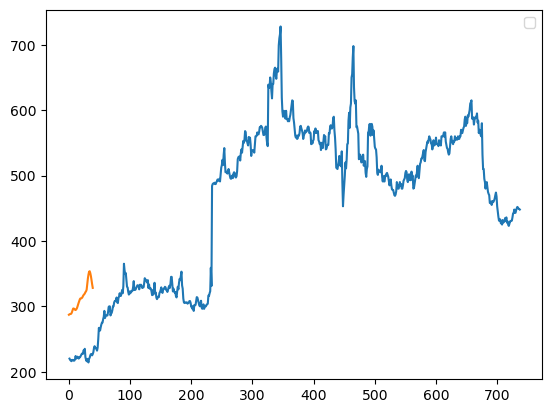

In [30]:
plt.plot(df1['y'])
plt.plot(pred)
plt.legend('train','pred')

In [42]:
s=df1['y']
s
m=s.values
m

array([220. , 218.1, 217. , 216.1, 218. , 218. , 217. , 218. , 217. ,
       219. , 224. , 220. , 221.9, 223. , 221.5, 220.1, 222. , 221.9,
       223.5, 225.5, 227.2, 228. , 227.3, 232.7, 231. , 235. , 222.3,
       218.5, 216. , 219.6, 216.5, 214.1, 219.8, 221.5, 225. , 226.9,
       227.1, 225. , 227. , 230. , 236. , 239. , 236. , 236. , 235. ,
       232.2, 236.8, 250. , 267. , 263. , 263. , 268. , 272. , 275. ,
       275.1, 280.4, 284. , 293. , 282. , 285. , 285.9, 285.9, 286. ,
       291. , 299. , 300. , 299.8, 286. , 289. , 290. , 294. , 299.9,
       300. , 306. , 308. , 308. , 310. , 313.5, 306. , 305. , 312.7,
       315. , 320. , 315.9, 316. , 320. , 325. , 320. , 331. , 365.1,
       355. , 349.7, 350.8, 340. , 329.9, 328.8, 322. , 318. , 319. ,
       323. , 320.7, 322. , 323.7, 323.9, 329.7, 338.5, 325. , 326. ,
       325.5, 328. , 330. , 332.2, 332. , 330.7, 326. , 333. , 332.5,
       333. , 330. , 328. , 330. , 329. , 335. , 343. , 340.9, 340.5,
       338. , 336.2,

In [43]:
def series_to_sup(data,n_in=1,n_out=1):
    nvars=1 if type(data) is list else data.shape[1]
    df=pd.DataFrame(data)
    cols=list()
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
    for i in range(0,n_out):
        cols.append(df.shift(-i))
    agg=pd.concat(cols,axis=1)
    agg.dropna()
    return agg.values

train=series_to_sup(m,n_in=6)
train

IndexError: tuple index out of range